In [2]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt
#import new_alg_v2 as na
torch.set_default_dtype(torch.float64)


**SGD:**

In [6]:
# using a net with dims of n0, n1, reurn the contribuition of each layer
def calc_chi(n0,n1, alg):
  # creating input vector and initial weights
  mu_x=0
  sigma_x= 1
  x_vec = torch.randn(n0)
  z = torch.tensor(1.)

  # setting up the network
  class Net(nn.Module): 

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 1/n0)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 1/n1)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat
  #define the net
  net = Net(n0, n1)
  w1_init = net.fc1.weight.clone()
  w2_init = net.fc2.weight.clone()
  loss_f = nn.MSELoss()
  alpha = 2e-2
  lr_new_alg = float(alpha*((2)**(-1)))
  optimizerSGD=0
  if(alg=="SGD"):
    optimizer = optim.SGD(net.parameters(), lr = 0.01)
  if(alg=="Adam"):
    optimizer = optim.Adam(net.parameters(), lr = 0.001)
  if(alg=="new_alg"):
    optimizer = na.new_alg(net.parameters(), lr=lr_new_alg)
    optimizerSGD = optim.SGD(net.parameters(),lr = lr_new_alg)


  
    
  z_hat = net(x_vec)
  initial_loss = loss_f(z_hat, z)
  # training the net
  steps = 20
  for i in range(steps):
    # zero the parameter gradients
    if(alg!="new_alg"):
      optimizer.zero_grad()
    else:
      optimizerSGD.zero_grad()

      
    # forward + backward + optimize
    #net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat.float(), z.float())
    loss.backward()
    optimizer.step()

  final_loss = float(loss_f(z_hat, z))

  # w1- init w2-final
  with torch.no_grad():
    w1_final=net.fc1.weight.clone()
    w2_final=net.fc2.weight.clone()

    net.fc1.weight[:] = w1_init
    z_hat_1 = net(x_vec)
    loss_1 = float(loss_f(z_hat_1, z))

  # w1- final w2-init
  with torch.no_grad():
    net.fc1.weight[:] = w1_final
    net.fc2.weight[:]=w2_init
    z_hat_2 = net(x_vec)
    loss_2 = float(loss_f(z_hat_2, z))

  denom = 2*final_loss - (loss_1 + loss_2)
  Xl1 = (final_loss - loss_1)/denom
  Xl2 = (final_loss-loss_2)/denom

  return float(Xl1) , float(Xl2)

In [7]:
Chi_L1_SGD=[]
Chi_L2_SGD=[]
Chi_L1_Adam=[]
Chi_L2_Adam=[]

#n0 run
for  n0 in range(1, 1000, 10):
  chi_sgd=calc_chi(n0,200,"SGD")
  Chi_L1_SGD.append(chi_sgd[0])
  Chi_L2_SGD.append(chi_sgd[1])
  
  chi_adam=calc_chi(n0,200,"Adam")
  Chi_L1_Adam.append(chi_adam[0])
  Chi_L2_Adam.append(chi_adam[1])




c:\Users\Shiram\anaconda3\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


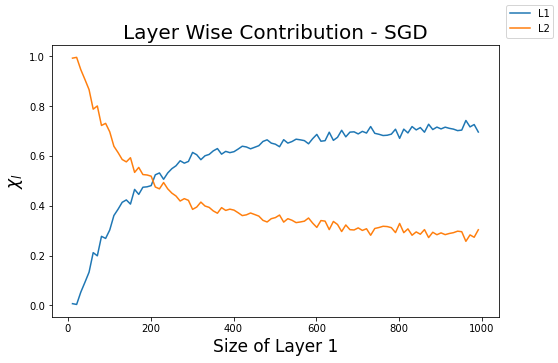

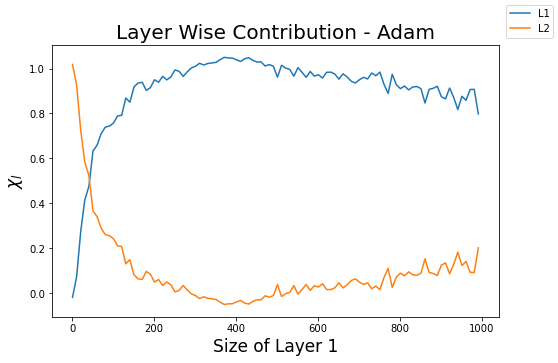

In [17]:
#figure , axis = plt.subplots(2,2)
x_vec=np.arange(1,1000,10)
Chi_L1_SGD = np.array(Chi_L1_SGD)
Chi_L2_SGD = np.array(Chi_L2_SGD)
Chi_L1_Adam = np.array(Chi_L1_Adam)
Chi_L2_Adam = np.array(Chi_L2_Adam)
'''
axis[0,0].plot(x_vec,Chi_L1_SGD,label="L1")
axis[0,0].plot(x_vec,Chi_L2_SGD,label="L2")
axis[0,0].set_title("FIG 1 - layer wise contribution - SGD")

axis[0,1].plot(x_vec,Chi_L1_Adam,label="L1")
axis[0,1].plot(x_vec,Chi_L2_Adam,label="L2")
axis[0,1].set_title("FIG 1 - layer wise contribution - Adam")
'''
#for SGD:
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vec,Chi_L1_SGD,label="L1")
plt.plot(x_vec,Chi_L2_SGD,label="L2")
plt.ylabel('$χ_{l}$', fontsize=17)
plt.xlabel('Size of Layer 1', fontsize=17)
plt.title("Layer Wise Contribution - SGD", fontsize=20)
fig.legend()

#for Adam:
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vec,Chi_L1_Adam,label="L1")
plt.plot(x_vec,Chi_L2_Adam,label="L2")
plt.ylabel('$χ_{l}$', fontsize=17)
plt.xlabel('Size of Layer 1', fontsize=17)
plt.title("Layer Wise Contribution - Adam", fontsize=20)
fig.legend()



In [5]:
Chi_L1_new_alg=[]
Chi_L2_new_alg=[]
half=[]

#n0 run
for  n0 in range(50, 500, 10):
  chi_new_alg=calc_chi(n0,200,"new_alg")
  Chi_L1_new_alg.append(chi_new_alg[0])
  Chi_L2_new_alg.append(chi_new_alg[1])
  half.append(0.5)

c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


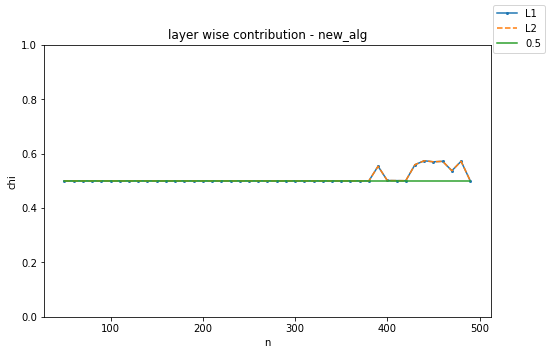

In [6]:
#for new_alg:
x_vec=np.arange(50,500,10)
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vec,Chi_L1_new_alg,label="L1", marker='o',markersize=2)
plt.plot(x_vec,Chi_L2_new_alg,label="L2",linestyle='dashed')
plt.plot(x_vec,half,label="0.5")
plt.ylabel('chi')
plt.ylim(0,1)
plt.xlabel('n')
plt.title("layer wise contribution - new_alg")
fig.legend()

*Wider nets:*

In [ ]:
Chi_L1_SGD=[]
Chi_L2_SGD=[]
Chi_L1_Adam=[]
Chi_L2_Adam=[]

#n0 run
for  n0 in range(100, 5000, 100):
  chi_sgd=calc_chi(n0,2500,"SGD")
  Chi_L1_SGD.append(chi_sgd[0])
  Chi_L2_SGD.append(chi_sgd[1])
  
  chi_adam=calc_chi(n0,2500,"Adam")
  Chi_L1_Adam.append(chi_adam[0])
  Chi_L2_Adam.append(chi_adam[1])

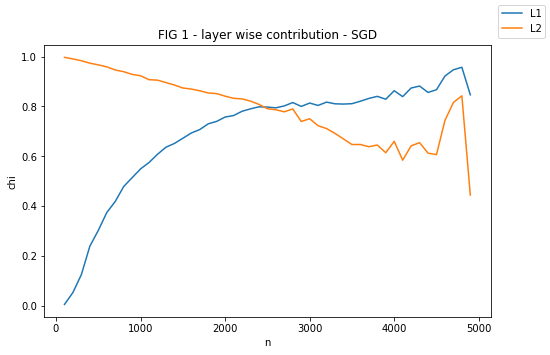

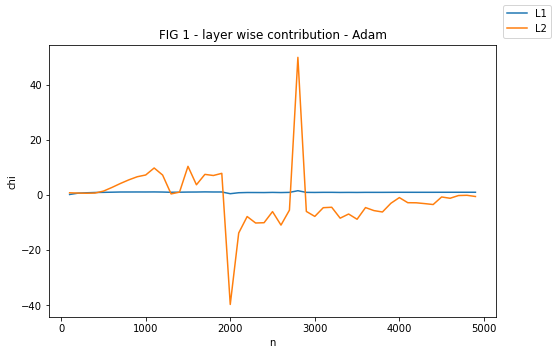

In [ ]:
#figure , axis = plt.subplots(2,2)
x_vec=np.arange(100,5000,100)
Chi_L1_SGD = np.array(Chi_L1_SGD)
Chi_L2_SGD = np.array(Chi_L2_SGD)
Chi_L1_Adam = np.array(Chi_L1_Adam)
Chi_L2_Adam = np.array(Chi_L2_Adam)

#for SGD:
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vec,Chi_L1_SGD,label="L1")
plt.plot(x_vec,Chi_L2_SGD,label="L2")
plt.ylabel('chi')
plt.xlabel('n')
plt.title("FIG 1 - layer wise contribution - SGD")
fig.legend()

#for Adam:
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vec,Chi_L1_Adam,label="L1")
plt.plot(x_vec,Chi_L2_Adam,label="L2")
plt.ylabel('chi')
plt.xlabel('n')
plt.title("FIG 1 - layer wise contribution - Adam")
fig.legend()


In [ ]:
# using a net with dims of n0, n1, reurn the contribuition of each layer
def calc_loss(lr_):
  # creating input vector and initial weights
  mu_x=0
  sigma_x= 1
  z = torch.tensor(1.)
  n0=100
  n1=200
  x_vec = torch.randn(n0)


  # setting up the network
  class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 1/n0)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 1/n1)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat
  #define the net
  net = Net(n0, n1)
  loss_f = nn.MSELoss()
  optimizer = na.new_alg(net.parameters(), lr=lr_)
  optimizerSGD = optim.SGD(net.parameters(),lr = 0.01)


  
    
  z_hat = net(x_vec)
  initial_loss = loss_f(z_hat, z)
  # training the net
  steps = 5
  loss=1
  for i in range(steps):
    optimizerSGD.zero_grad()
    z_hat = net(x_vec)
    loss = loss_f(z_hat, z)
    loss.backward()
    optimizer.step()

  final_loss = loss



  return (final_loss)

In [ ]:
losses=[]
x_vector=[]

#n0 run
for  x in range(0, 6, 1):
  lr=10**(-x)
  x_vector.append(lr)
  loss=calc_loss(lr)
  losses.append(loss)


c:\Users\Melech\anaconda3\envs\deep_learn\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
losses

[tensor(2.4891e+143, grad_fn=<MseLossBackward0>),
 tensor(1.9269e+16, grad_fn=<MseLossBackward0>),
 tensor(0.1049, grad_fn=<MseLossBackward0>),
 tensor(0.8986, grad_fn=<MseLossBackward0>),
 tensor(1.0102, grad_fn=<MseLossBackward0>),
 tensor(1.0081, grad_fn=<MseLossBackward0>)]

No handles with labels found to put in legend.


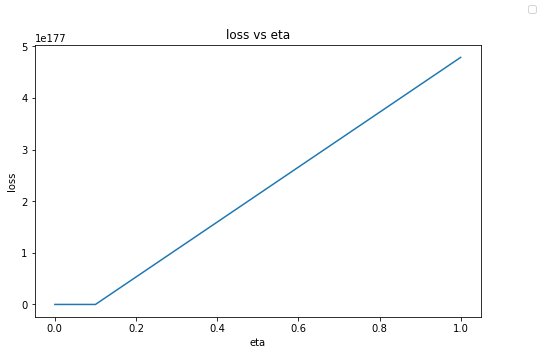

In [ ]:
fig = plt.figure(figsize=(8, 5)) 
plt.plot(x_vector,losses)
plt.ylabel('loss')
plt.xlabel('eta')
plt.title("loss vs eta")
fig.legend()